# Notebook P3

### Librerías

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.impute import SimpleImputer

### Lectura de datos

In [16]:
train = pd.read_csv("practica3_datos/train.csv", na_values="NaN") # Definimos na_values para identificar bien los valores perdidos

In [17]:
print(train.columns)
str(len(train.columns))+" columnas"

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

'81 columnas'

# Visualización

Vamos a hacer varias visualizaciones del conjunto de datos dado.

### Heatmap
Para mostrar las correlaciones entre las variables

In [18]:
print("hola")

hola


### Distribution plot
1. **SalePrice**: Visualizo los valores de venta de entrenamiento.

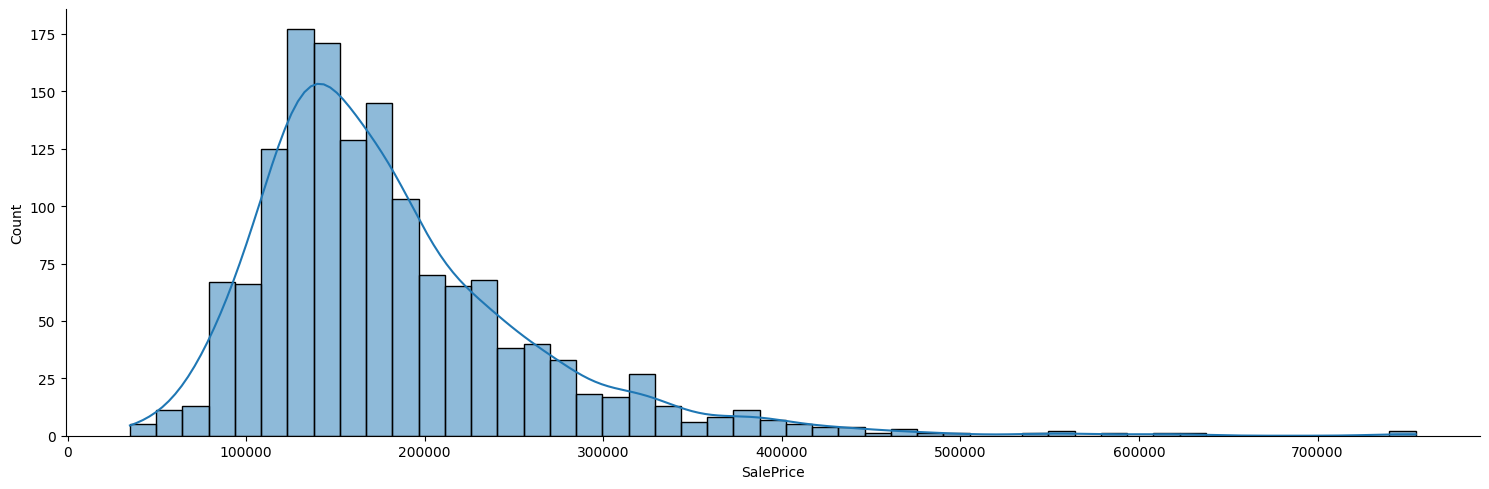

In [19]:
sns.displot(data=train, x="SalePrice", aspect=3, kde=True)

### Boxplot
Ahora visualizamos cómo cambia la distribución (usando un boxplot) según otro atributo, como el tipo de calle.
1. **Street**

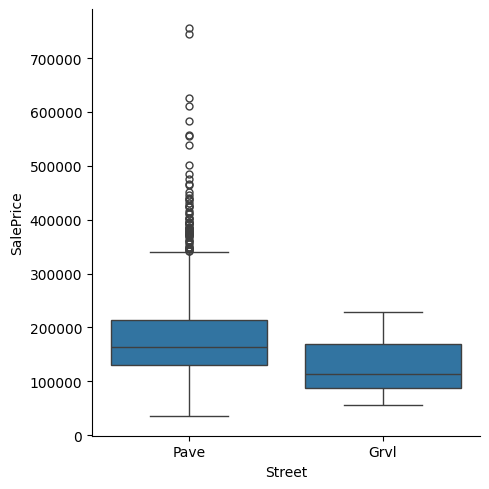

In [20]:
sns.catplot(data=train, y="SalePrice", x="Street", kind="box")

2. **OverallQual**: La calidad general de la casa podría estar relacionada con el precio de venta.

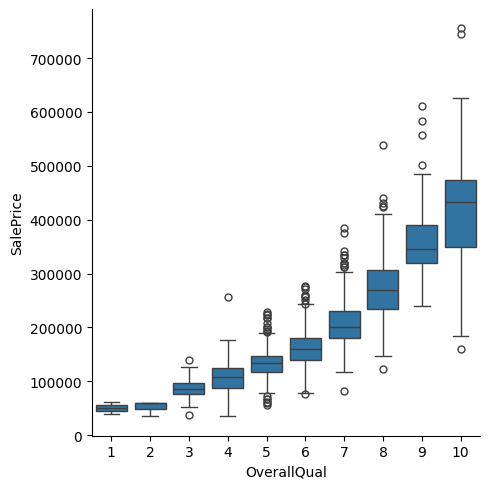

In [21]:
sns.catplot(data=train, y="SalePrice", x="OverallQual", kind="box")

3. **YearBuilt**: Puede ser interesante observar cómo se distribuyen las ventas en función del año de construcción de la casa.

El año más antiguo en 'YearBuilt' es: 1872
El año más reciente en 'YearBuilt' es: 2010


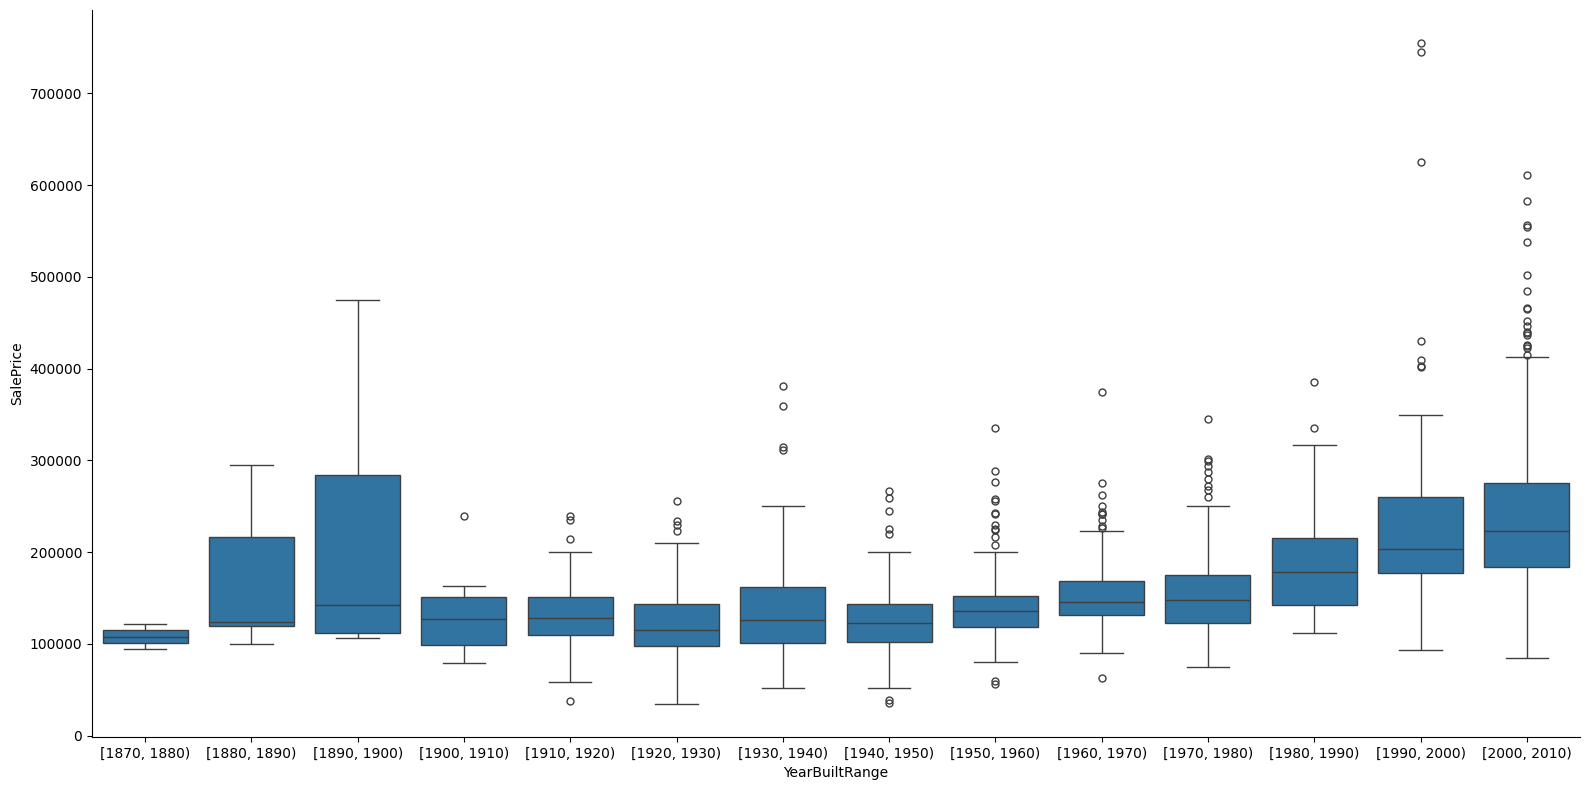

In [22]:
#Quiero saber el rango que abarca el atributo YearBuilt
min_year = train['YearBuilt'].min()
max_year = train['YearBuilt'].max()

print(f"El año más antiguo en 'YearBuilt' es: {min_year}")
print(f"El año más reciente en 'YearBuilt' es: {max_year}")

# Crear un nuevo DataFrame con la columna YearBuilt, donde voy a agrupar los ejemplos en rangos de 10 años
plot_data = train.copy()
plot_data['YearBuiltRange'] = pd.cut(plot_data['YearBuilt'], bins=range(1870, 2011, 10), right=False)

#sns.catplot(data=train, y="SalePrice", x="YearBuilt", kind="box", aspect=3,)
# Crear el catplot con los datos agrupados por 'YearBuiltRange'
sns.catplot(data=plot_data, y="SalePrice", x="YearBuiltRange", kind="box", height=8, aspect=2)

4. **YearRemodAdd**: Puede ser interesante observar cómo se distribuyen las ventas en función del año de la última reforma de la casa.

El año más antiguo en 'YearRemodAdd' es: 1950
El año más reciente en 'YearRemodAdd' es: 2010


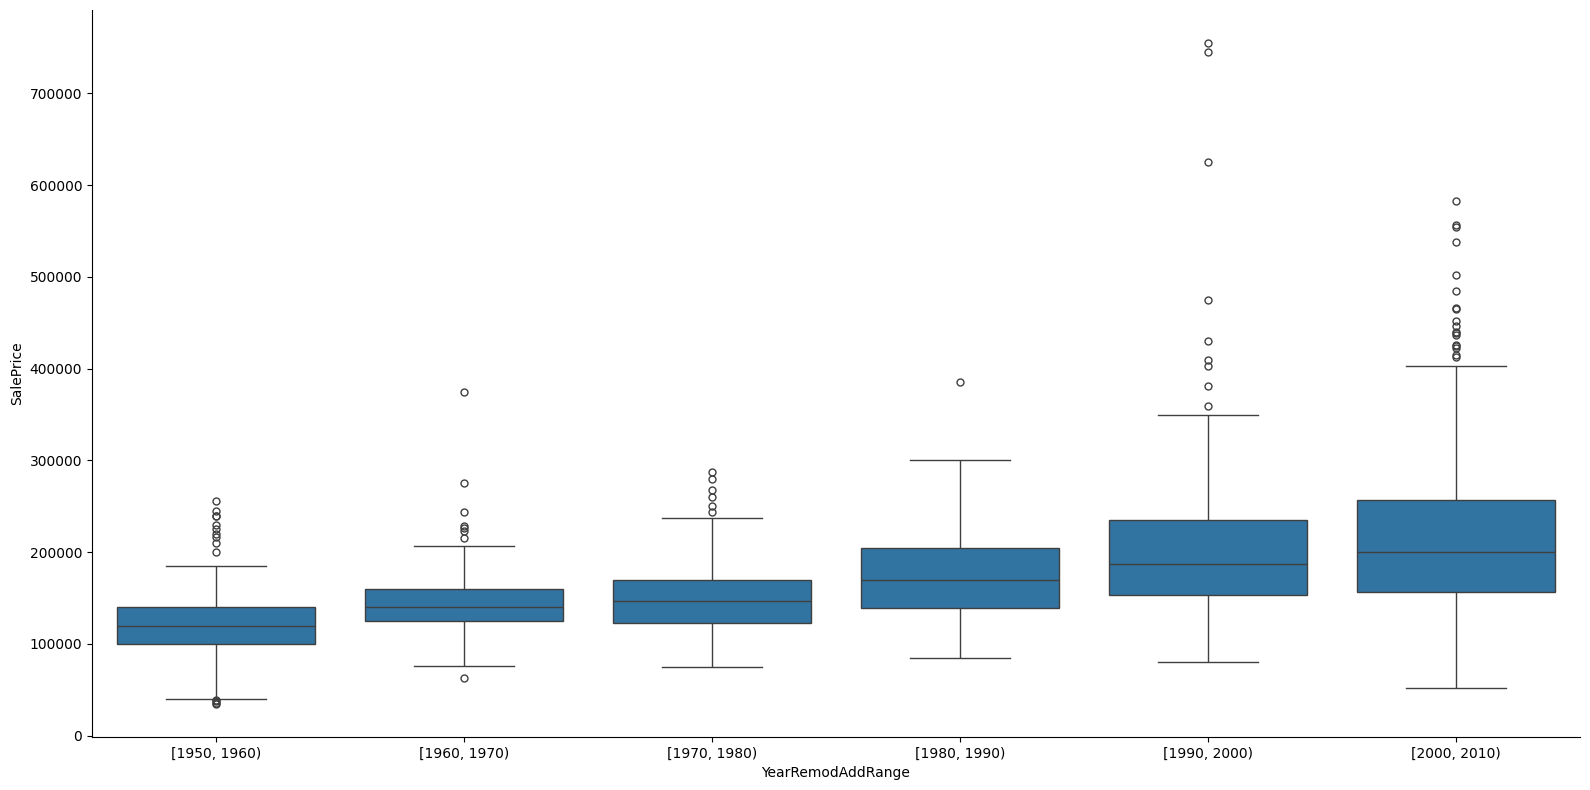

In [23]:
#Quiero saber el rango que abarca el atributo YearBuilt
min_year = train['YearRemodAdd'].min()
max_year = train['YearRemodAdd'].max()

print(f"El año más antiguo en 'YearRemodAdd' es: {min_year}")
print(f"El año más reciente en 'YearRemodAdd' es: {max_year}")

# Crear un nuevo DataFrame con la columna YearBuilt, donde voy a agrupar los ejemplos en rangos de 10 años
plot_data = train.copy()
plot_data['YearRemodAddRange'] = pd.cut(plot_data['YearRemodAdd'], bins=range(1950, 2011, 10), right=False)

#sns.catplot(data=train, y="SalePrice", x="YearBuilt", kind="box", aspect=3,)
# Crear el catplot con los datos agrupados por 'YearBuiltRange'
sns.catplot(data=plot_data, y="SalePrice", x="YearRemodAddRange", kind="box", height=8, aspect=2)

## Procesar datos

Vamos a procesar datos:
- Outliers
- Valores perdidos: eliminamos los atributos con muchos missing values e imputamos el resto de missing values.
- Etiquetado.

Primero quito el Id de train que no me sirve de nada, y complica el etiquetado. También la quito de test pero antes lo guardo (para el fichero de salida)

In [24]:
if 'Id' in train:
    train.drop('Id', axis=1, inplace=True)

In [25]:
test = pd.read_csv("practica3_datos/test.csv", na_values="NaN")
test_ids = test.Id #Guardo el Id del archivo test para luego adjuntarlo en el fichero de salida
test = test.drop('Id', axis=1)

### Eliminamos outliers
Visualizamos con un scatter plot la relación entre SalePrice y algunos atributos

In [26]:
fig = plt.figure(figsize=(10,10))

def scatter_plot(atributo, datos):
    fig, ax = plt.subplots()
    ax.scatter(x = datos[atributo], y = datos['SalePrice'], edgecolor='black')
    plt.ylabel('SalePrice', fontsize=10)
    plt.xlabel(atributo, fontsize=10)
    plt.show()

<Figure size 1000x1000 with 0 Axes>

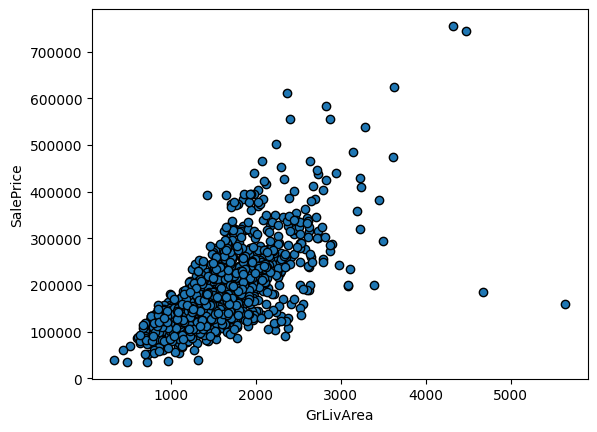

In [27]:
scatter_plot('GrLivArea', train)

Observamos que hay casas con mucho terreno pero que mantienen el precio bajo. Al mismo tiempo que hay otras que tienen precios desorbitados, pero esto no se sale de la distribución. 

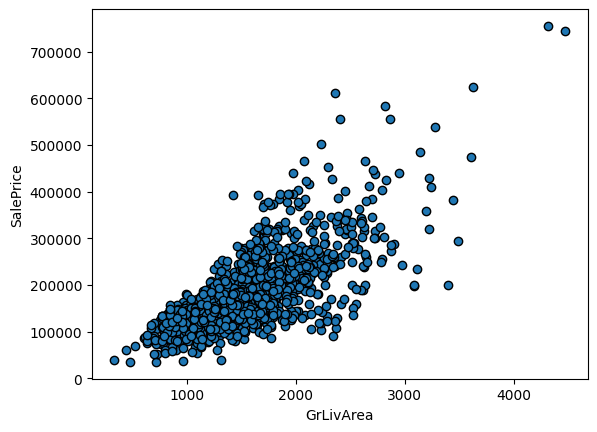

In [28]:
#Eliminamos los outliers y mostramos de nuevo la gráfica
train=train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice']<200000)].index)
scatter_plot('GrLivArea', train)

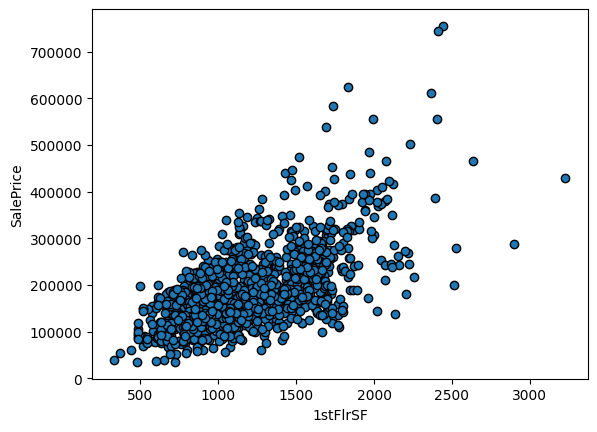

In [29]:
scatter_plot('1stFlrSF', train) #área del primer piso

No considero que haya outliers para el atributo '1stFlrSF'

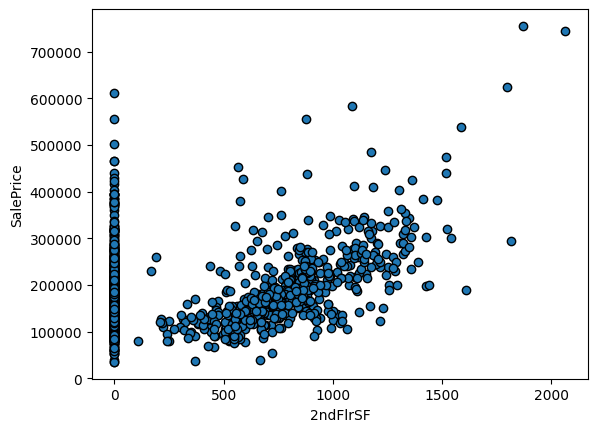

In [30]:
scatter_plot('2ndFlrSF', train) #área del segundo piso (muchas casas no tienen segundo piso y su precio sigue siendo alto)

Tampoco considero que haya outliers para '2ndFlrSF'

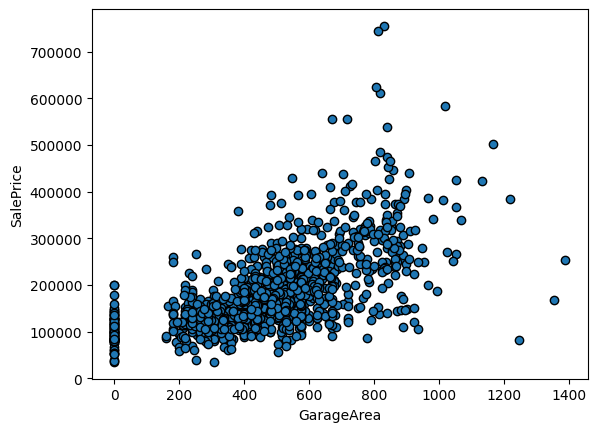

In [31]:
scatter_plot('GarageArea', train)

In [32]:
#Eliminamos los outliers y mostramos de nuevo la gráfica
train=train.drop(train[(train['GarageArea'] > 1200) & (train['SalePrice']<300000)].index)
#scatter_plot('GarageArea', train)

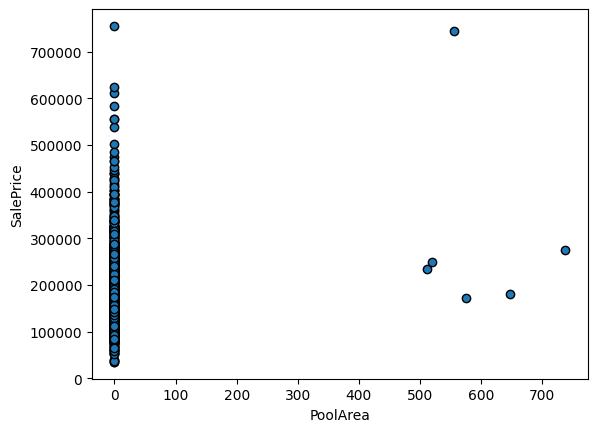

In [33]:
scatter_plot('PoolArea', train)

Vemos que las casas no tienen piscina caso ninguna, así que posteriormente trataremos los atributos relacionados con la piscina (los eliminaremos)

AHORA HACEMOS LO MISMO PERO CON VARIABLES CATEGÓRICAS

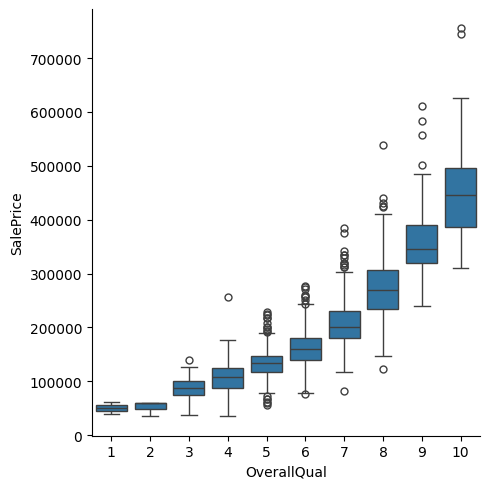

In [34]:
sns.catplot(data=train, y="SalePrice", x="OverallQual", kind="box")

Vemos que no hay outliers muy destacables.

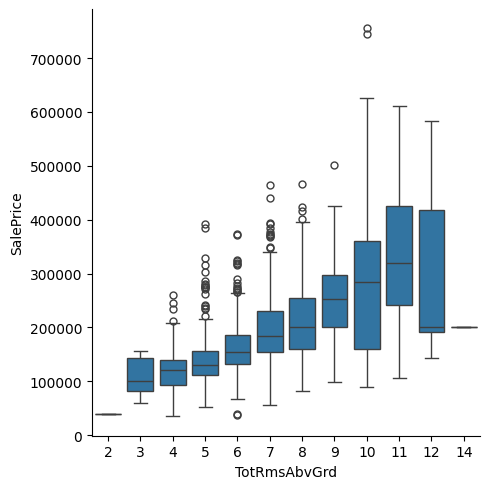

In [35]:
sns.catplot(data=train, y="SalePrice", x="TotRmsAbvGrd", kind="box")

Observamos que hay algunos outliers que podríamos eliminar pues están muy alejados del resto de ejemplos

In [36]:
#Eliminamos los outliers y mostramos de nuevo la gráfica
train=train.drop(train[ (train['SalePrice']>700000)].index)
#sns.catplot(data=train, y="SalePrice", x="TotRmsAbvGrd", kind="box")

Concateno la entrada de ambos para los procesos de etiquetado, que aprenda con ambos conjuntos

In [37]:
input_all = pd.concat([train.drop('SalePrice', axis=1), test])

In [38]:
input_all.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Ahora selecciono los atributos de tipo categórico (los que no son numéricos), para convertirlos a númericos

In [39]:
col_cat = list(input_all.select_dtypes(exclude=np.number).columns)
len(col_cat)
input_all[col_cat].head() #Compruebo que son realmente categóricos

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### 1. Procesamiento de valores perdidos
Antes de nada veamos el número total de valores perdidos:

In [40]:
#valores perdidos en conjunto de entrenamiento
print("Train missing values: " + str(train.isnull().sum().sum()))


#valores perdidos en conjunto de prueba
print("Test missing values: " + str(test.isnull().sum().sum()))

Train missing values: 7801
Test missing values: 7878


In [41]:
#Función para analizar los missing values de un conjunto de datos
def Valores_perdidos_columnas(datos):    
    total = datos.isnull().sum().sort_values(ascending=False)
    valores_unicos = datos.nunique() #n de valores distintos, si es 1 no nos sirve la columna
    missing_data = pd.concat([total, valores_unicos], axis=1, 
                             keys=['nº de valores perdidos', 'valores unicos'], sort = False)
    
    return missing_data

In [42]:
tabla_train=Valores_perdidos_columnas(train)
tabla_train.head(20)

,nº de valores perdidos,valores unicos
PoolQC,1448,3
MiscFeature,1400,4
Alley,1362,2
Fence,1173,4
MasVnrType,870,3
FireplaceQu,689,5
LotFrontage,258,109
GarageYrBlt,81,97
GarageCond,81,5
GarageType,81,6


In [43]:
tabla_test=Valores_perdidos_columnas(test)
tabla_test.head(20)

,nº de valores perdidos,valores unicos
PoolQC,1456,2
MiscFeature,1408,3
Alley,1352,2
Fence,1169,4
MasVnrType,894,3
FireplaceQu,730,5
LotFrontage,227,115
GarageYrBlt,78,97
GarageFinish,78,3
GarageQual,78,4


In [44]:
#Verificamos que no haya en ningún conjunto de datos un atributo con valores unicos=1
filas_valores_unicos_1 = tabla_train[tabla_train['valores unicos'] == 1].index
print("Train-Filas con valores únicos igual a 1:")
print(filas_valores_unicos_1)

Train-Filas con valores únicos igual a 1:
Index([], dtype='object')


In [45]:
#Verificamos que no haya en ningún conjunto de datos un atributo con valores unicos=1
filas_valores_unicos_1 = tabla_test[tabla_test['valores unicos'] == 1].index
print("Test-Filas con valores únicos igual a 1:")
print(filas_valores_unicos_1)

Test-Filas con valores únicos igual a 1:
Index(['Utilities'], dtype='object')


Por tanto vamos a eliminar las columnas **PoolQC, MiscFeature, Alley y Utilities**.

In [46]:
#Función para gestionar valores perdidos
def valores_perdidos_eliminar(datos):
    #PUNTO 1
    #Eliminar columnas con muchos valores perdidos. Eliminar columnas con unique_values =1
    #Como no hay piscinas, elimino todos los atributos relacionados con las piscinas. Lo mismo con la miscelánea.
    datos=datos.drop(['PoolQC', 'PoolArea', 'MiscFeature', 'MiscVal', 'Alley', 'Utilities'], axis=1)
    
    #PUNTO 2
    # Rellenar valores faltantes en la columna 'Fence' con 'nofence'
    datos['Fence'] = datos['Fence'].fillna('nofence')
    datos['FireplaceQu'] = datos['FireplaceQu'].fillna('nofireplace')
    datos['MasVnrType'] = datos['MasVnrType'].fillna('None')
    
    #PUNTO 3
    #Las variables de garaje con valores perdidos normalmente es porque no hay garaje: 'nogaraje'
    # Variables categóricas, las rellenamos con 'nogarage'
    for col in ('GarageCond', 'GarageType', 'GarageFinish', 'GarageQual'):
        datos[col] = datos[col].fillna('nogarage')
    
    # Variable numérica, la rellenamos con 0
    datos['GarageYrBlt'] = datos['GarageYrBlt'].fillna(0)
    
    #Hago lo mismo con las variables relacionadas con el basement
    # Variables categóricas, las rellenamos con 'nobasement'
    for col in ('BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2'):
        datos[col] = datos[col].fillna('None')
    
    
    #SI AÚN QUEDA ALGÚN MISSING VALUE:
    
    #PUNTO 4
    #Reemplazo los valores numéricos restantes por la mediana
    col_num = list(datos.select_dtypes(include=np.number).columns)
    if ('SalePrice' in col_num):
        col_num.remove('SalePrice')
    imputer_num = SimpleImputer(strategy="median")
    imputer_num.fit(input_all[col_num])
    datos[col_num] = imputer_num.transform(datos[col_num])
    
    #PUNTO 5
    #Reemplazo los datos categóricos restantes por el más frecuente
    imputer_cat = SimpleImputer(strategy="most_frequent")
    col_cat = list(datos.select_dtypes(exclude=np.number).columns) #Cojo los atributos categoricos
    imputer_cat.fit(datos[col_cat])
    datos[col_cat] = imputer_cat.transform(datos[col_cat])
    
    return datos

In [47]:
train_missval= valores_perdidos_eliminar(train)
test_missval= valores_perdidos_eliminar(test)

#valores perdidos en conjunto de entrenamiento
print("Train missing values: " + str(train_missval.isnull().sum().sum()))

#valores perdidos en conjunto de prueba
print("Test missing values: " + str(test_missval.isnull().sum().sum()))

Train missing values: 0
Test missing values: 0


In [48]:
#Sustituimos los dataframe originales por los modificados
train=train_missval
test=test_missval

### 2. Etiquetado

In [49]:
input_all = pd.concat([train.drop('SalePrice', axis=1), test])

col_cat = list(input_all.select_dtypes(exclude=np.number).columns)
len(col_cat)
input_all[col_cat].head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Typ,nofireplace,Attchd,RFn,TA,TA,Y,nofence,WD,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,Typ,TA,Attchd,RFn,TA,TA,Y,nofence,WD,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Typ,TA,Attchd,RFn,TA,TA,Y,nofence,WD,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,Typ,Gd,Detchd,Unf,TA,TA,Y,nofence,WD,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,Typ,TA,Attchd,RFn,TA,TA,Y,nofence,WD,Normal


In [50]:
from sklearn.preprocessing import LabelEncoder #Ahora hago el etiquetado con LabelEncoder
labelers = {}
test_l = test.copy()
train_l = train.copy()

for col in col_cat:
    labelers[col] = LabelEncoder().fit(input_all[col])
    test_l[col] = labelers[col].transform(test[col])
    train_l[col] = labelers[col].transform(train[col])
    
train_l.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3,65.0,8450.0,1,3,3,4,0,5,...,61.0,0.0,0.0,0.0,4,2.0,2008.0,8,4,208500
1,20.0,3,80.0,9600.0,1,3,3,2,0,24,...,0.0,0.0,0.0,0.0,4,5.0,2007.0,8,4,181500
2,60.0,3,68.0,11250.0,1,0,3,4,0,5,...,42.0,0.0,0.0,0.0,4,9.0,2008.0,8,4,223500
3,70.0,3,60.0,9550.0,1,0,3,0,0,6,...,35.0,272.0,0.0,0.0,4,2.0,2006.0,8,0,140000
4,60.0,3,84.0,14260.0,1,0,3,2,0,15,...,84.0,0.0,0.0,0.0,4,12.0,2008.0,8,4,250000


In [51]:
#Compruebo que estén todos los atributos
assert((train_l.columns == train.columns).all())

### Heatmap

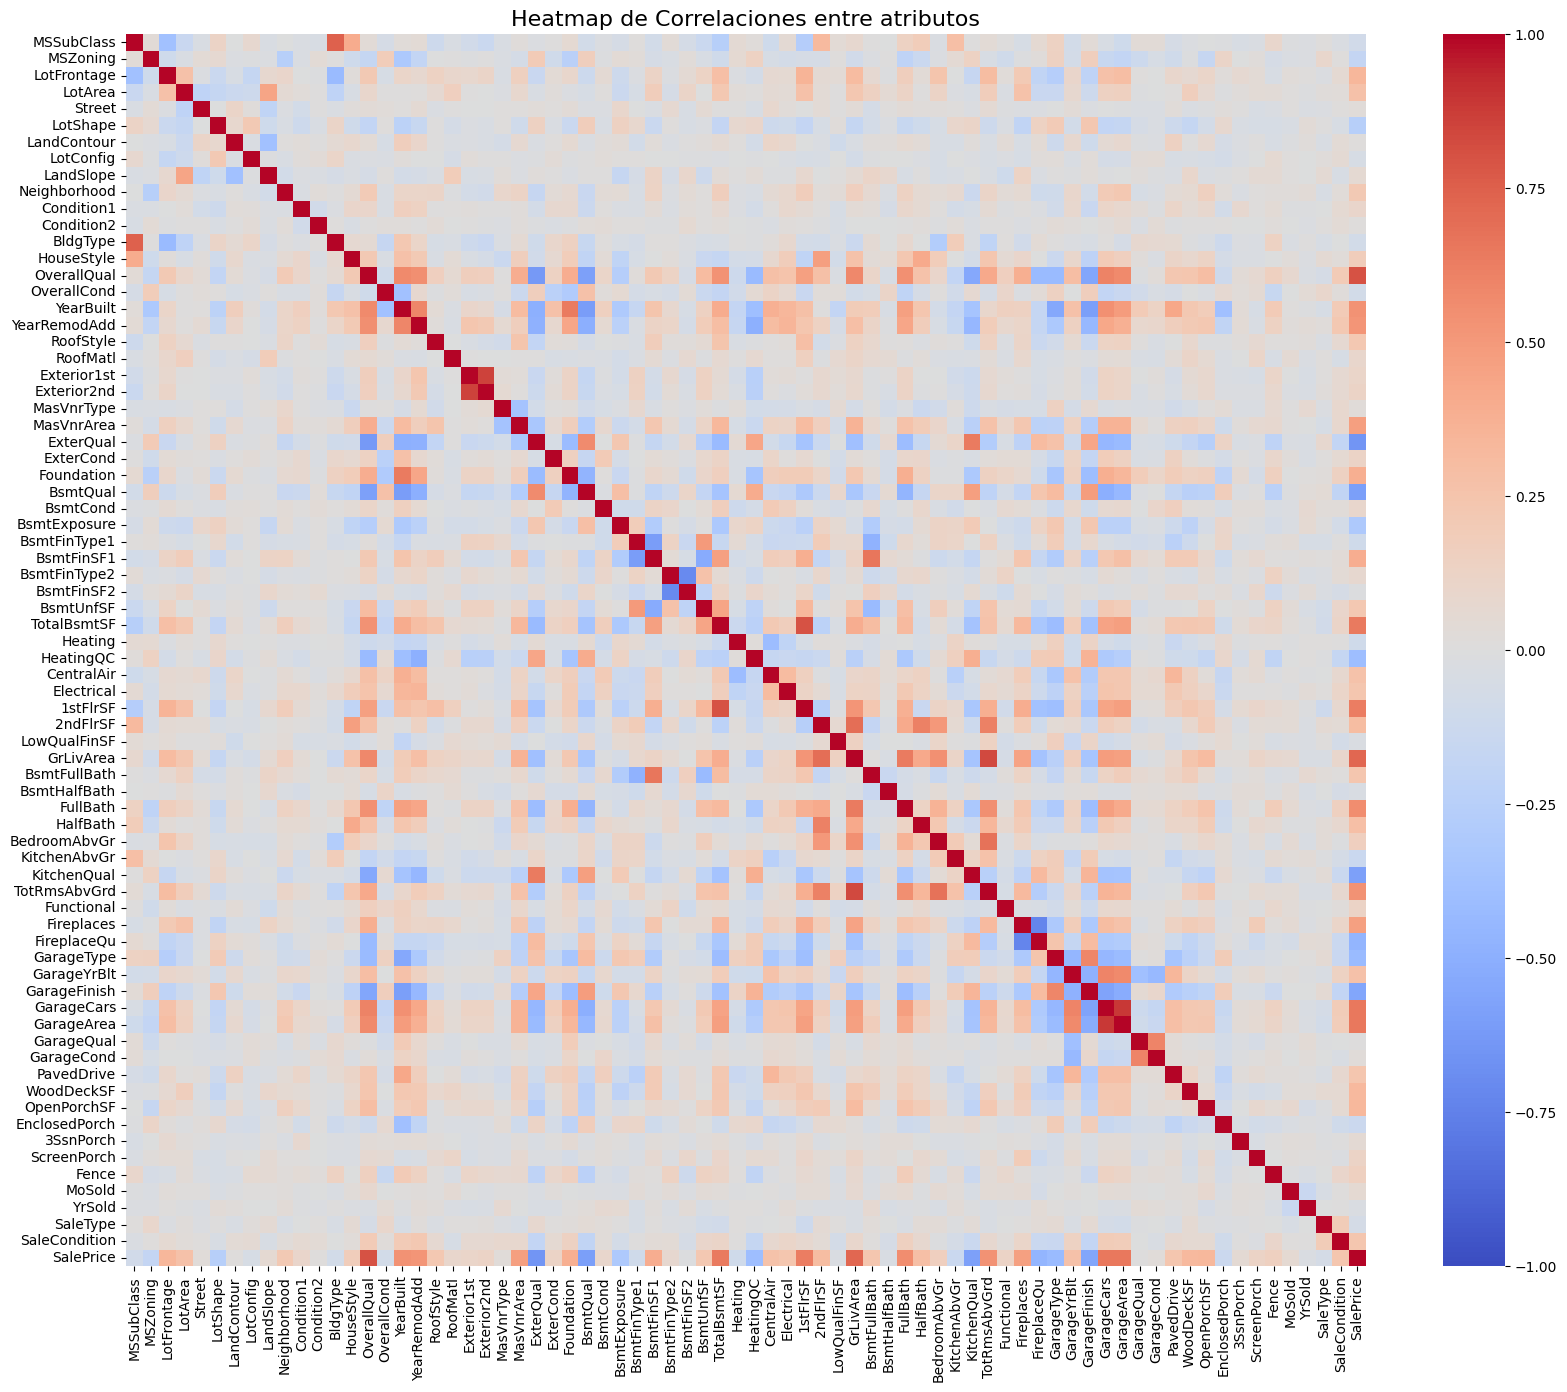

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df con tus 80 variables
df = train_l
if 'Id' in train:
    df.drop('Id', axis=1, inplace=True)

# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Configura el tamaño de la figura
plt.figure(figsize=(20, 16))

# Crea el heatmap utilizando Seaborn
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, annot=False)

# Añade etiquetas y título
plt.title("Heatmap de Correlaciones entre atributos", fontsize=16)

# Muestra el heatmap
plt.show()

# Preparamos los conjuntos train y test
Defino en X_train los valores sin el atributo a predecir, y. 

También voy a eliminar el Id de entrenamiento que es problemático, pero lo guardo para el fichero de salida.

In [53]:
y_train = train_l.SalePrice
X_train = train_l.drop('SalePrice', axis=1)

if 'Id' in test_l:
    test_l.drop('Id', axis=1, inplace=True)

X_test = test_l

# Aplico el modelo (Decision Tree)
Comenzamos aplicando un modelo sencillo: árbol de decisión.

In [54]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
from sklearn.model_selection import cross_val_score

Uso la métrica que aplica la competición. Los modelos tienden a maximizar, por eso la métrica de error tiene signo negativo.

In [57]:
import sklearn
# Estas son las métricas posibles
print(sklearn.metrics.get_scorer_names())

values = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
print(values)
print(values.mean())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

Ahora vamos a entrenar con todo el conjunto de entrenamiento

In [43]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

Ahora predigo.

In [44]:
pred = model.predict(X_test)

Guardo el fichero de salida para evaluar:

In [45]:
salida = pd.DataFrame({'Id': test_ids, 'SalePrice': pred})
salida.to_csv("resultados/PruebaX_DT.csv", index=False) #Este es el fichero que podemos subir a la competición

# Modelo Random Forest
Un random forest es más completo que el decision tree

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(5, shuffle=True, random_state=124345)
model = RandomForestRegressor(criterion='squared_error', max_depth=10)
values = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_log_error', cv=cv)
print(values)
print(values.mean())

[-0.02422921 -0.01773628 -0.01628715 -0.02073641 -0.02325916]
-0.020449643315257723


In [47]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

In [48]:
pred = model.predict(X_test)

In [49]:
salida = pd.DataFrame({'Id': test_ids, 'SalePrice': pred})
salida.to_csv("resultados/PruebaX_RF.csv", index=False) #Este es el fichero que podemos subir a la competición

# Visualizando la importancia
Vamos a visualizar la importancia de los parámetros. En scikit-learn muchos modelos la calculan, así que es fácil.
Primero entreno con el conjunto de entrenamiento (cross_val_score deja el modelo sin aprender).

In [50]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

Ahora muestro la importancia. en model.feature_importances_ aparece la importancia, y en model.feature_names_in sus nombres.

In [51]:
df_imp = pd.DataFrame({'name': model.feature_names_in_, 'importance': model.feature_importances_})

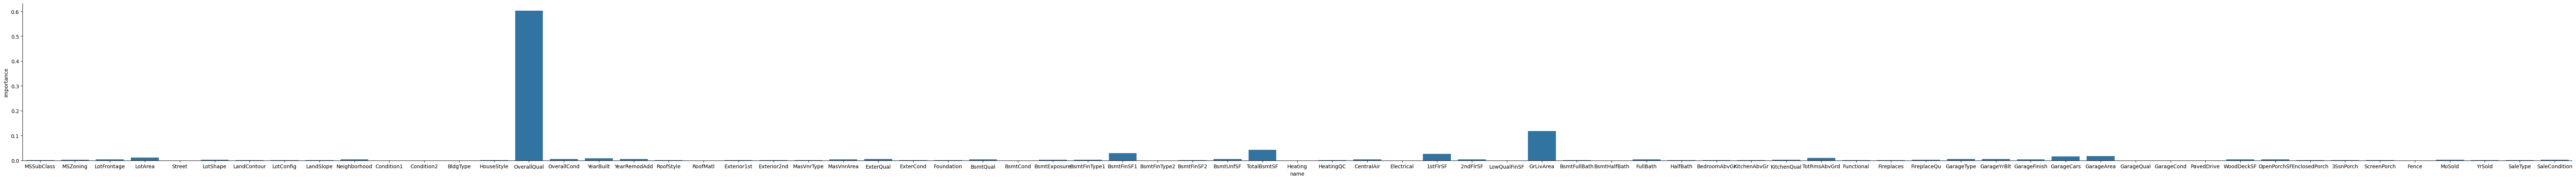

In [52]:
sns.catplot(data=df_imp, x='name', y='importance', kind='bar', aspect=14) #Podemos abrir la imagen en otra pestaña y hacer zoom :)

Vamos a coger los 10 atributos con mayor importancia

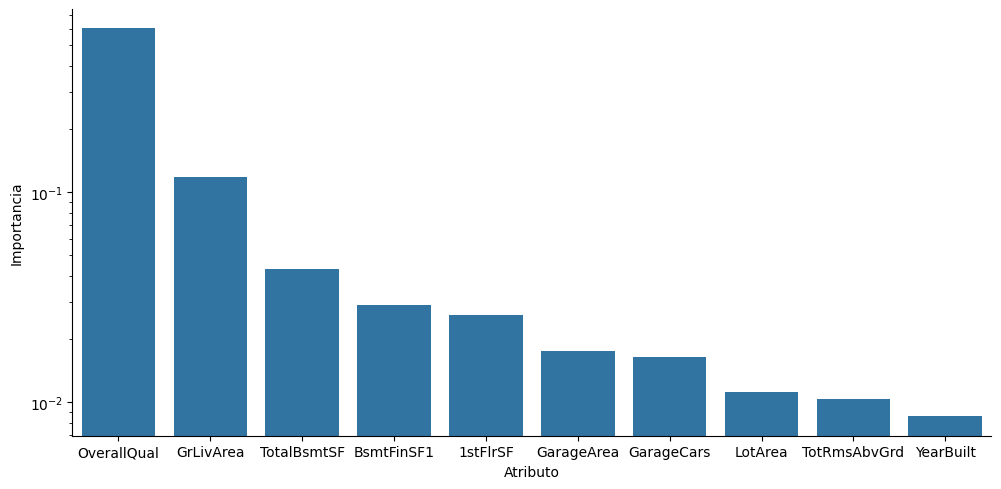

In [54]:
N_features = 10
ind_sort = np.argsort(model.feature_importances_)
#model.feature_importances_[ind_sort]
ind_sort = ind_sort[::-1]
model.feature_importances_[ind_sort]
ind_sort = ind_sort[:N_features]

df_imp2 = pd.DataFrame({'name': model.feature_names_in_[ind_sort], 'importance': model.feature_importances_[ind_sort]})
g = sns.catplot(data=df_imp2, x='name', y='importance', kind='bar', aspect=2)
g.set(xlabel='Atributo', ylabel='Importancia', yscale='log')

Vuelvo a ejecutar Random Forest pero sólo empleando esos 10 atributos

In [ ]:
y_train_importance = train_l.SalePrice
X_train_importance = train_l.drop('SalePrice', axis=1)

if 'Id' in test_l:
    test_l.drop('Id', axis=1, inplace=True)

X_test_importance = test_l


# model.feature_names_in_[ind_sort] contiene los nombres de las 10 columnas seleccionadas
columnas_seleccionadas = model.feature_names_in_[ind_sort]

# Filtrar solo las columnas seleccionadas en X_train_importance
X_train_importance = X_train_importance[columnas_seleccionadas]

# Filtrar solo las columnas seleccionadas en X_test_importance
X_test_importance = X_test_importance[columnas_seleccionadas]

X_train_importance

Aplico Random Forest de nuevo

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(5, shuffle=True, random_state=124345)
model = RandomForestRegressor(criterion='squared_error', max_depth=10)
values = cross_val_score(model, X_train_importance, y_train_importance, scoring='neg_mean_squared_log_error', cv=cv)
print(values)
print(values.mean())

In [ ]:
model.fit(X_train_importance, y_train_importance)
pred = model.predict(X_test_importance)
salida = pd.DataFrame({'Id': test_ids, 'SalePrice': pred})
salida.to_csv("resultados/PruebaX_RF.csv", index=False) #Este es el fichero que podemos subir a la competición

# Aplicando tuning automático

Vamos a aplicar un GridSearchCV para mejorar dos parámetros del RF:

- max_depth: de 7 a 15.
- criterion: squared_error (hay otros absolute_error o friedman_mse pero no aplico por temas de tiempo ahora mismo).

In [ ]:
#X_train=X_train_importance
#y_train=y_train_importance

#X_test=X_test_importance

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'max_depth' : [7, 10, 15],
    'criterion' :['squared_error']#, 'absolute_error', 'friedman_mse']
}

Ahora creamos un modelo que englobe al anterior, y en éste cuando haga el fit probará la mejor combinación.

In [ ]:
tuned_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_log_error')

Medimos de nuevo

In [ ]:
tuned_values = cross_val_score(tuned_model, X_train, y_train, scoring='neg_mean_squared_log_error', cv=cv)
print(tuned_values)
print(tuned_values.mean())

Ahora vamos a entrenar con todo el conjunto de entrenamiento

In [ ]:
tuned_model.fit(X_train, y_train)

In [ ]:
tuned_model.best_params_ #Resultados obtenidos (mejores parámetros)

In [ ]:
tuned_model.best_estimator_

In [ ]:
#Ahora predigo con el mejor modelo encontrado
pred = tuned_model.predict(X_test)
pred2 = tuned_model.best_estimator_.predict(X_test)
np.all(pred==pred2)

In [ ]:
salida = pd.DataFrame({'Id': test_ids, 'SalePrice': pred2})
salida.to_csv("resultados/PruebaX_RF_tuning.csv", index=False) #Este es el fichero que podemos subir a la competición

# Modelo Catboost

In [ ]:
#!pip install catboost
from catboost import CatBoostRegressor

In [ ]:
model_catboost=CatBoostRegressor(iterations=5000, learning_rate=0.02, depth=4, eval_metric='RMSE', early_stopping_rounds=20, verbose=0)

In [ ]:
model_catboost.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(n_splits=10)

In [ ]:
values = cross_val_score(model_catboost, X_train, y_train, scoring='neg_mean_squared_log_error', cv=cv)

In [ ]:
print(values)
print(values.mean())

In [ ]:
pred_cat = model_catboost.predict(X_test)

In [ ]:
salida = pd.DataFrame({'Id': test_ids, 'SalePrice': pred_cat})
salida.to_csv("resultados/PruebaX_Catboost.csv", index=False) #Este es el fichero que podemos subir a la competición

# Modelo XGBoost

In [ ]:
#!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model_xgboost = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    colsample_bytree=0.45,
    subsample=0.8,
    min_child_weight=2,
   # early_stopping_rounds=20,
    'max_depth': 3,
    verbose=0
)

model_xgboost.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)
#cv = KFold(n_splits=10)

In [ ]:
values = cross_val_score(model_xgboost, X_train, y_train, scoring='neg_mean_squared_log_error', cv=cv)
print(values)
print(values.mean())

In [ ]:
pred_xg = model_xgboost.predict(X_test)

In [ ]:
salida = pd.DataFrame({'Id': test_ids, 'SalePrice': pred_xg})
salida.to_csv("resultados/PruebaX_XGboost.csv", index=False) #Este es el fichero que podemos subir a la competición

In [ ]:
xgbreg = xgb.XGBRegressor(seed=0)
param_grid2 = {'n_estimators': [2000], 
              'learning_rate': [0.05],
              'max_depth': [3, 7],
              'subsample': [0.8],
              'colsample_bytree': [0.45, 0.75]}
    
xgb_model = GridSearchCV(estimator=xgbreg, param_grid=param_grid2, n_jobs=1, cv=10)
xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
MSE_train = np.mean((y_train_pred - y_train)**2)

## Bagging Ensemble


In [ ]:
pred_ensemble = (
    0.5 * pred_cat +
    0.5 * pred_xg
)

In [ ]:
salida = pd.DataFrame({'Id': test_ids, 'SalePrice': pred_ensemble})
salida.to_csv("resultados/PruebaX_Ensemble.csv", index=False)

# Catboost haciendo tuning automático

In [41]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'iterations': [500, 1000, 2000, 5000],
    'learning_rate': [0.01, 0.02, 0.03, 0.05],
    'depth': [2, 4, 6, 8],
    'verbose': [0]
}

# Inicializar el modelo CatBoost
model_catboost = CatBoostRegressor(eval_metric='RMSE', early_stopping_rounds=20)
print("inicializado modelo")

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model_catboost, param_grid=param_grid,
                           scoring='neg_mean_squared_log_error', cv=KFold(n_splits=10), verbose=1)
print("configurada la búsqueda de parámetros")

# Realizar la búsqueda en la cuadrícula
grid_search.fit(X_train, y_train)
print("realizada la búsqueda")


# Obtener el mejor modelo y sus hiperparámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", best_params)

# Realizar la validación cruzada con el mejor modelo
cv = KFold(n_splits=10)
values = cross_val_score(best_model, X_train, y_train, scoring='neg_mean_squared_log_error', cv=cv)

# Imprimir los resultados de la validación cruzada
print("Resultados de la validación cruzada:", values)
print("Media de los resultados:", values.mean())

# Hacer predicciones en el conjunto de prueba
pred_cat = best_model.predict(X_test)

# Crear el DataFrame de salida
salida = pd.DataFrame({'Id': test_ids, 'SalePrice': pred_cat})

# Guardar el DataFrame en un archivo CSV
salida.to_csv("resultados/PruebaX_Catboost_tuning.csv", index=False)

inicializado modelo
configurada la búsqueda de parámetros
Fitting 10 folds for each of 64 candidates, totalling 640 fits
realizada la búsqueda
Mejores hiperparámetros: {'depth': 6, 'iterations': 5000, 'learning_rate': 0.01, 'verbose': 0}
Resultados de la validación cruzada: [-0.0128304  -0.00957863 -0.0113986  -0.01444601 -0.01963271 -0.01090895
 -0.0144924  -0.01041566 -0.00828876 -0.0166544 ]
Media de los resultados: -0.012864652574598434
